In [1]:
# 1. THE STABILITY FIX
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"          # disable GPU completely
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"

import tensorflow as tf
tf.config.optimizer.set_jit(False)
tf.config.set_visible_devices([], "GPU")          # extra safety if TF still sees GPU

✅ Data Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price               253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
 9   salt_composition    7488 non-null    object 
 10  medicine_desc       7488 non-null    object 
 11  side_effects        7488 non-null    object 
 12  drug_interactions   7488 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 23.5+ MB

📊 After Cleaning


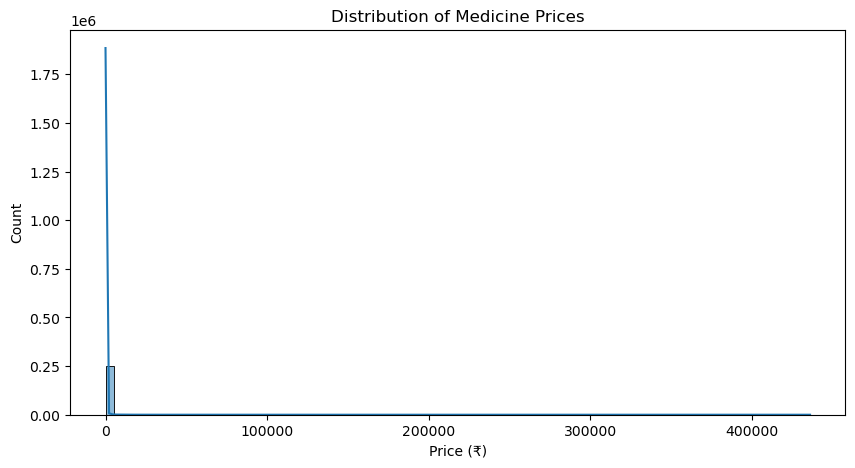


💰 Price Statistics:
 count    253973.000000
mean        270.530844
std        3029.584134
min           0.000000
25%          48.000000
50%          79.000000
75%         140.000000
max      436000.000000
Name: price, dtype: float64

📉 Discontinuation Value Counts:
discontinued
False    246068
True       7905
Name: count, dtype: int64


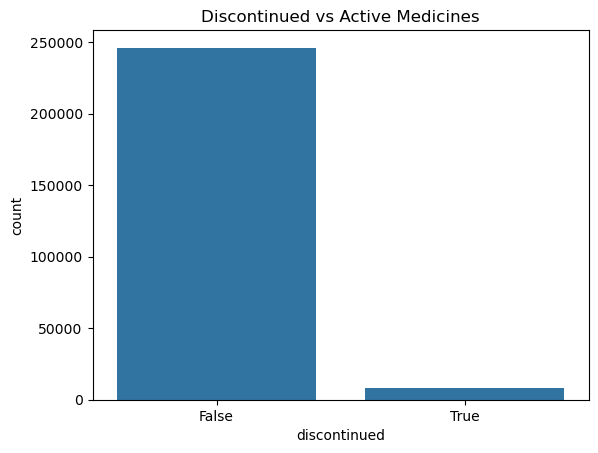


🏭 Top 12 Manufacturers:
 manufacturer_name
Sun Pharmaceutical Industries Ltd    2986
Cipla Ltd                            2467
Intas Pharmaceuticals Ltd            2302
Torrent Pharmaceuticals Ltd          2027
Alkem Laboratories Ltd               1809
Abbott                               1777
Zydus Cadila                         1768
Lupin Ltd                            1735
Micro Labs Ltd                       1305
Mankind Pharma Ltd                   1297
Macleods Pharmaceuticals Pvt Ltd     1165
Glenmark Pharmaceuticals Ltd         1131
Name: count, dtype: int64


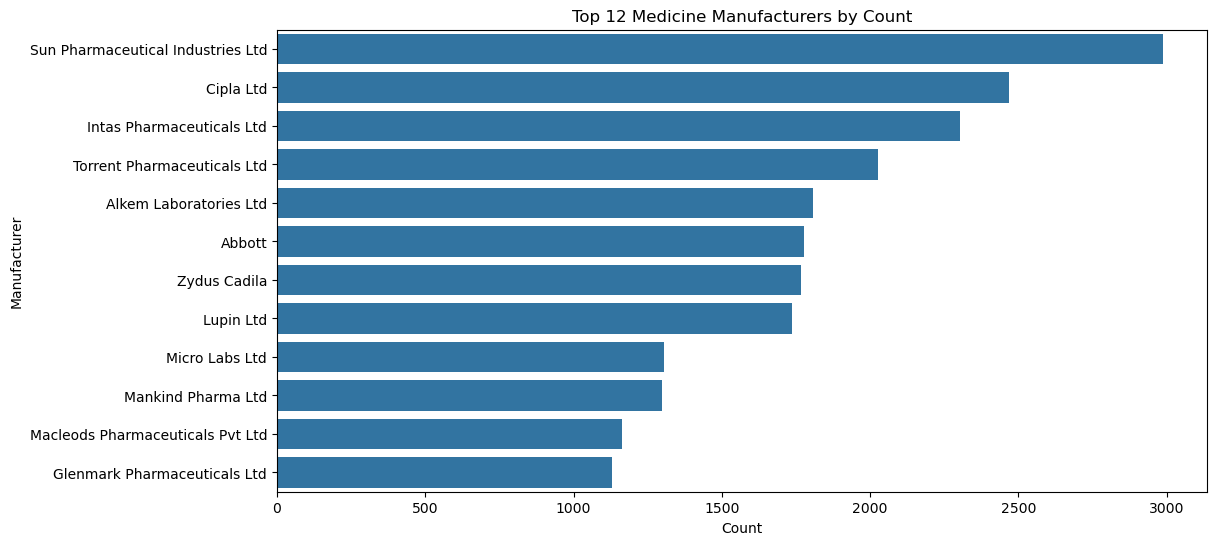


💵 Median Price by Top Manufacturer:
 manufacturer_name
Mankind Pharma Ltd                    76.70
Micro Labs Ltd                        91.00
Abbott                                95.00
Alkem Laboratories Ltd                99.50
Cipla Ltd                            101.15
Torrent Pharmaceuticals Ltd          102.10
Zydus Cadila                         119.25
Sun Pharmaceutical Industries Ltd    123.00
Macleods Pharmaceuticals Pvt Ltd     128.00
Glenmark Pharmaceuticals Ltd         129.00
Lupin Ltd                            130.53
Intas Pharmaceuticals Ltd            133.45
Name: price, dtype: float64


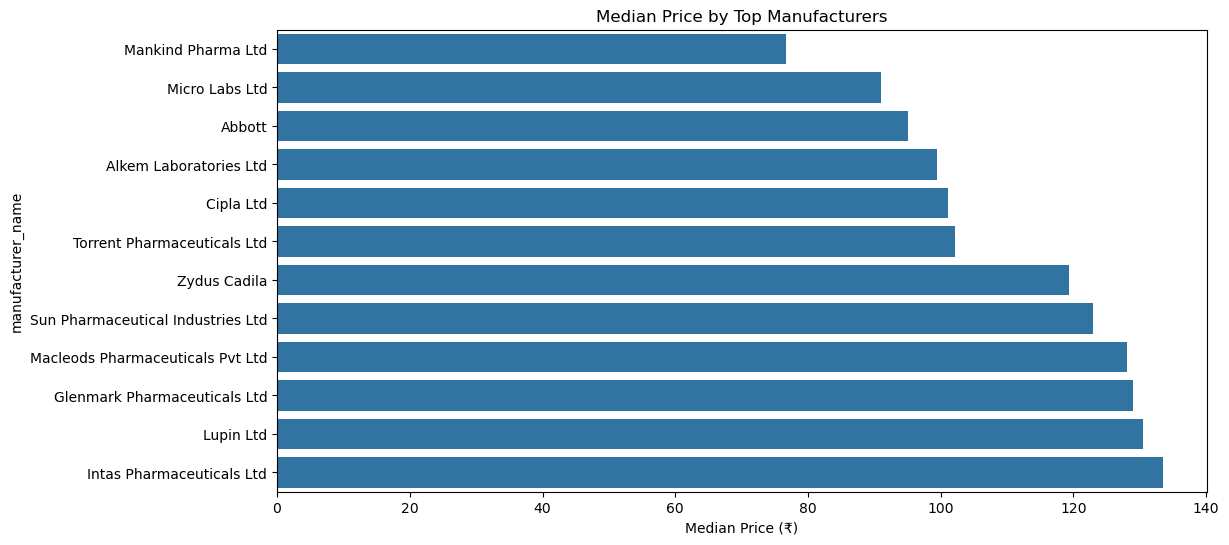

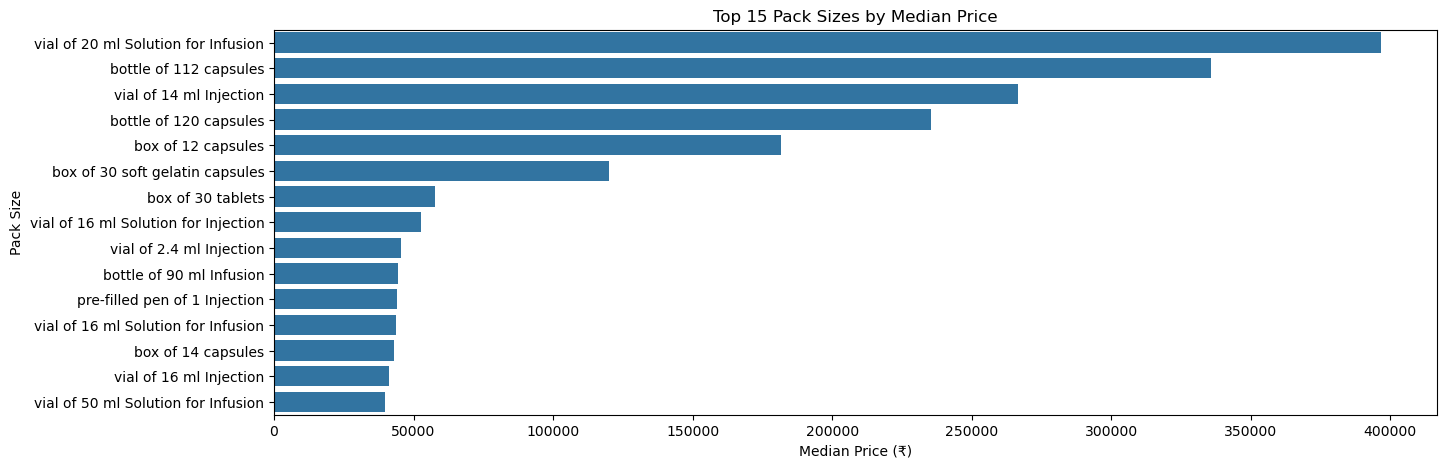


💊 Top 15 Primary Ingredients:
 short_composition1
Aceclofenac (100mg)      6930
Domperidone (30mg)       5126
Cefixime (200mg)         3532
Diclofenac (50mg)        3140
Domperidone (10mg)       3088
Levocetirizine (5mg)     2656
Pantoprazole (40mg)      2643
Telmisartan (40mg)       2314
Ofloxacin (200mg)        2308
Glimepiride (2mg)        2169
Nimesulide (100mg)       2151
Amoxycillin  (500mg)     2123
Rabeprazole (20mg)       2101
Azithromycin (500mg)     1997
Ofloxacin (200mg)        1988
Name: count, dtype: int64


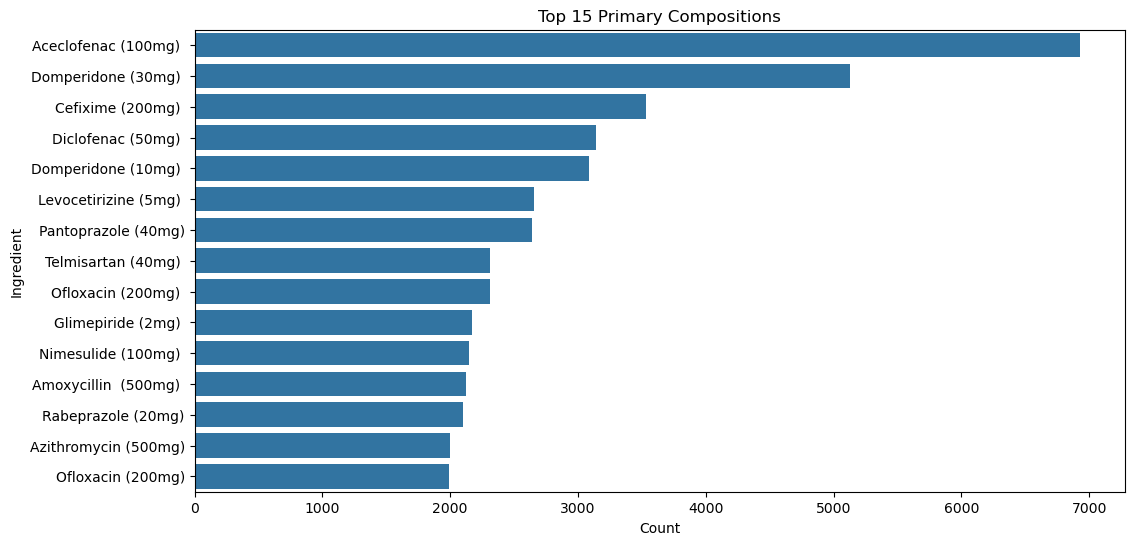

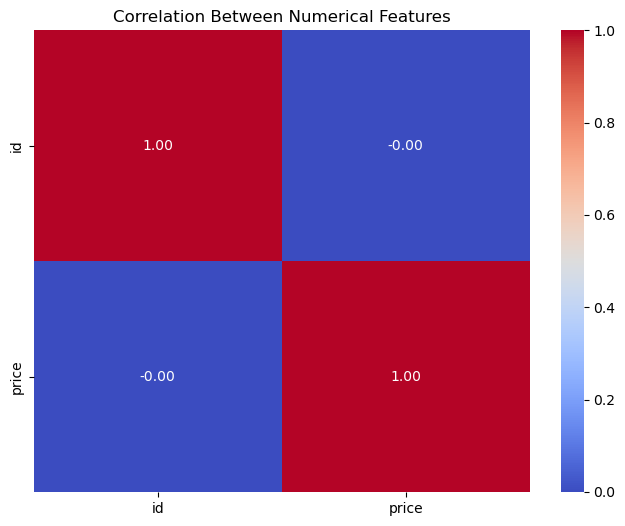


✅ Analysis Completed!


In [2]:
# 📌 indian_medicine_analysis.ipynb

# --- 1) Setup / Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# improve display
pd.set_option('display.max_columns', 50)

# --- 2) Load the Data ---
file_path = "data/updated_indian_medicine_data.csv"
df = pd.read_csv(file_path)

print("✅ Data Loaded Successfully")
df.head(), df.info()

# --- 3) Basic Cleaning ---
# Example: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.rename(columns={
    "price(₹)": "price",
    "is_discontinued": "discontinued"
})

# Convert price to numeric (if needed)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print("\n📊 After Cleaning")
df.describe(include='all')

# --- 4) Price Distribution ---
plt.figure(figsize=(10,5))
sns.histplot(df['price'].dropna(), bins=80, kde=True)
plt.title("Distribution of Medicine Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.show()

# Price stats
print("\n💰 Price Statistics:\n", df['price'].describe())

# --- 5) Discontinuation Analysis ---
print("\n📉 Discontinuation Value Counts:")
print(df['discontinued'].value_counts(dropna=False))

sns.countplot(x="discontinued", data=df)
plt.title("Discontinued vs Active Medicines")
plt.show()

# --- 6) Top Manufacturers ---
top_mfr = df['manufacturer_name'].value_counts().nlargest(12)
print("\n🏭 Top 12 Manufacturers:\n", top_mfr)

plt.figure(figsize=(12,6))
sns.barplot(y=top_mfr.index, x=top_mfr.values)
plt.title("Top 12 Medicine Manufacturers by Count")
plt.xlabel("Count")
plt.ylabel("Manufacturer")
plt.show()

# --- 7) Price by Manufacturer ---
# Focus on manufacturers with substantial data
popular_mfr = top_mfr.index
median_price_by_mfr = df[df['manufacturer_name'].isin(popular_mfr)].groupby('manufacturer_name')['price'].median().sort_values()
print("\n💵 Median Price by Top Manufacturer:\n", median_price_by_mfr)

plt.figure(figsize=(12,6))
sns.barplot(x=median_price_by_mfr.values, y=median_price_by_mfr.index)
plt.title("Median Price by Top Manufacturers")
plt.xlabel("Median Price (₹)")
plt.show()

# --- 8) Pack Size Price Relationship ---
# Clean pack_size_label if exists
if 'pack_size_label' in df.columns:
    plt.figure(figsize=(15,5))
    pack_prices = df.groupby('pack_size_label')['price'].median().sort_values(ascending=False).head(15)
    sns.barplot(x=pack_prices.values, y=pack_prices.index)
    plt.title("Top 15 Pack Sizes by Median Price")
    plt.xlabel("Median Price (₹)")
    plt.ylabel("Pack Size")
    plt.show()

# --- 9) Active Ingredients Analysis ---
# Extract most common primary composition
if 'short_composition1' in df.columns:
    comp_counts = df['short_composition1'].value_counts().nlargest(15)
    print("\n💊 Top 15 Primary Ingredients:\n", comp_counts)

    plt.figure(figsize=(12,6))
    sns.barplot(x=comp_counts.values, y=comp_counts.index)
    plt.title("Top 15 Primary Compositions")
    plt.xlabel("Count")
    plt.ylabel("Ingredient")
    plt.show()

# --- 10) Optional: Correlation Heatmap ---
num_cols = df.select_dtypes(include=['float64','int64']).columns
if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Between Numerical Features")
    plt.show()

print("\n✅ Analysis Completed!")


--- Starting Part 1: Data Analysis ---

[1] Analyzing Pharma Giants...


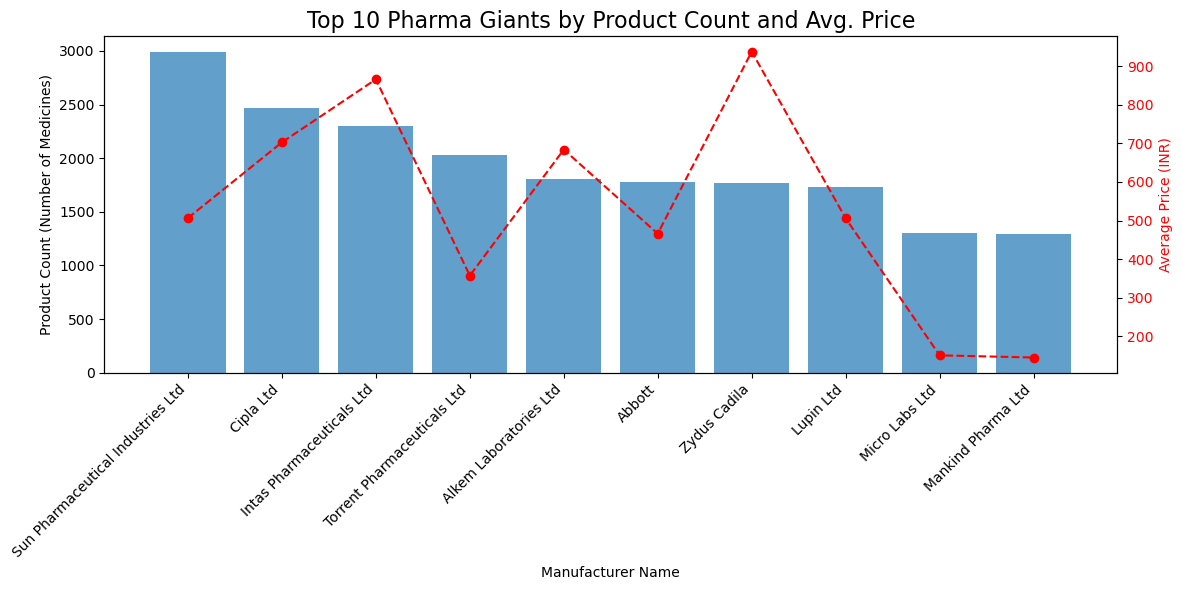


[2] Checking Product Lifecycle Status (Discontinued Products)...
Total Products: 253973
Discontinued Products: 7905
Percentage of Discontinued Products: 3.11%

[3] Analyzing Medicine Types...


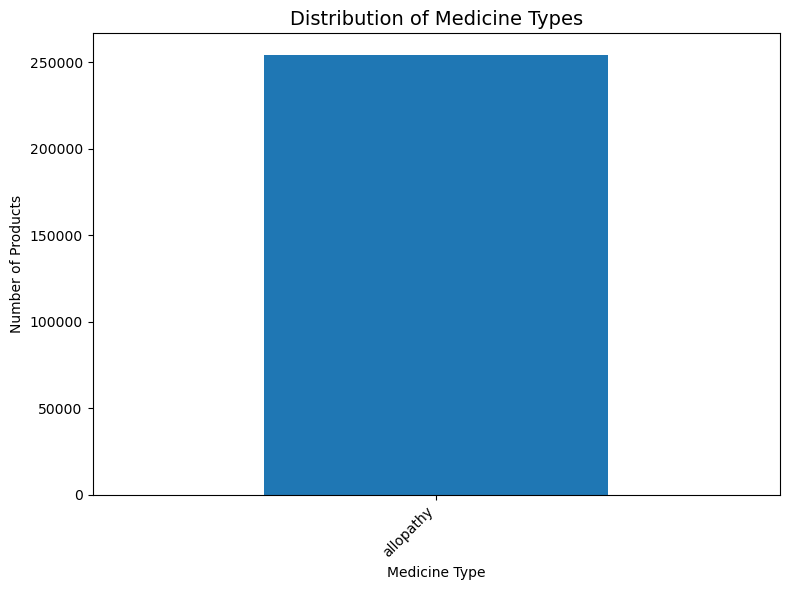

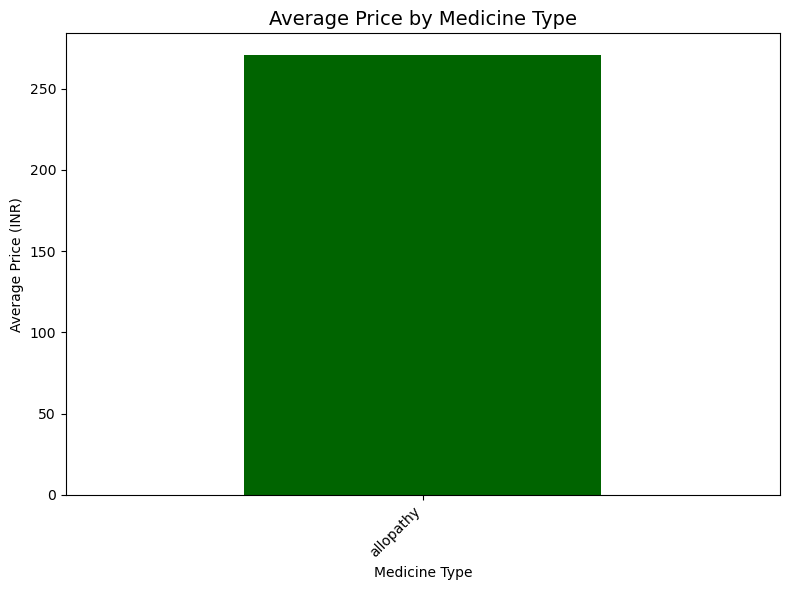


--- Medicine Type Analysis Summary ---
            Count  Average Price (INR)
type                                  
allopathy  253973           270.530844


In [3]:
# PROMPT:
# Prompt: Write a Python script for a Jupyter Notebook that analyzes a pharmaceutical dataset named data/updated_indian_medicine_data.csv. The script must include the following:

# 1. Environment Setup: Implement a safe plt.style setup that tries ggplot, then falls back to seaborn (darkgrid), and finally defaults to standard matplotlib if others fail.

# 2. Pharma Giant Analysis: > * Identify the top 10 manufacturers by product count.

# - Create a dual-axis chart. The primary axis (bars) should show the Product Count, and the secondary axis (red dashed line with markers) should show the Average Price for those specific top 10 giants.

# - Ensure x-axis labels are rotated 45 degrees and use numeric positioning to prevent label mismatch.

# 3. Lifecycle Analysis: Calculate and print the total number of products, the count of discontinued products (using the Is_discontinued column), and the percentage of the total they represent.

# 4. Medicine Type Analysis: > * Generate two separate bar charts: one for the distribution (count) of type and one for the average price per type (sorted descending).

# 5. Print a summary DataFrame table combining both the Count and Average Price by type.


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Load the dataset
df = pd.read_csv("data/updated_indian_medicine_data.csv")

print("--- Starting Part 1: Data Analysis ---")

# --- 1. Pharma Giants: Product Count & Average Price ---
print("\n[1] Analyzing Pharma Giants...")

# Calculate product count for each manufacturer
manufacturer_counts = df["manufacturer_name"].value_counts()
top_10_manufacturers = manufacturer_counts.head(10).index

# Filter the DataFrame for only the top 10
df_top_10 = df[df["manufacturer_name"].isin(top_10_manufacturers)]

# Calculate average price for the top 10
avg_price_top_10 = (
    df_top_10.groupby("manufacturer_name")["price"].mean().reindex(top_10_manufacturers)
)

# Create a combined figure for Product Count and Average Price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Use numeric x positions to avoid tick/label mismatch
x = np.arange(len(top_10_manufacturers))

# Plot Product Count (Primary Axis)
ax1.bar(x, manufacturer_counts.head(10).values, alpha=0.7)
ax1.set_xlabel("Manufacturer Name")
ax1.set_ylabel("Product Count (Number of Medicines)")
ax1.set_title("Top 10 Pharma Giants by Product Count and Avg. Price", fontsize=16)

ax1.set_xticks(x)
ax1.set_xticklabels(top_10_manufacturers, rotation=45, ha="right")

# Plot Average Price (Secondary Axis)
ax2 = ax1.twinx()
ax2.plot(x, avg_price_top_10.values, color="red", marker="o", linestyle="--")
ax2.set_ylabel("Average Price (INR)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Save the combined figure
plt.tight_layout()
plt.savefig("images/manufacturer_analysis.png", dpi=200)
plt.show()
plt.close()

# --- 2. Product Lifecycle Status: Discontinued Percentage ---
print("\n[2] Checking Product Lifecycle Status (Discontinued Products)...")

# If Is_discontinued is boolean, sum() works; if it's 0/1 ints, also works.
discontinued_count = df["Is_discontinued"].sum()
total_products = len(df)
discontinued_percentage = (discontinued_count / total_products) * 100

print(f"Total Products: {total_products}")
print(f"Discontinued Products: {discontinued_count}")
print(f"Percentage of Discontinued Products: {discontinued_percentage:.2f}%")

# --- 3. Medicine Types: Distribution and Average Price ---
print("\n[3] Analyzing Medicine Types...")

# Calculate distribution of medicine types
type_distribution = df["type"].value_counts()

# Calculate average price per medicine type
avg_price_by_type = df.groupby("type")["price"].mean().sort_values(ascending=False)

# Plot Type Distribution
plt.figure(figsize=(8, 6))
type_distribution.plot(kind="bar")
plt.title("Distribution of Medicine Types", fontsize=14)
plt.xlabel("Medicine Type")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("images/type_distribution.png", dpi=200)
plt.show()
plt.close()

# Plot Average Price by Type
plt.figure(figsize=(8, 6))
avg_price_by_type.plot(kind="bar", color="darkgreen")
plt.title("Average Price by Medicine Type", fontsize=14)
plt.xlabel("Medicine Type")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("images/avg_price_by_type.png", dpi=200)
plt.show()
plt.close()

# Display key data points as a table for the user
type_analysis_df = pd.DataFrame(
    {
        "Count": type_distribution,
        "Average Price (INR)": avg_price_by_type.reindex(type_distribution.index),
    }
)

print("\n--- Medicine Type Analysis Summary ---")
print(type_analysis_df)


In [4]:
df = pd.read_csv("data/updated_indian_medicine_data.csv")
df.sample(5)
df[df["side_effects"].notna()].sample(5)



,id,name,price,Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2,salt_composition,medicine_desc,side_effects,drug_interactions
108938,108939,Infutec NS Infusion,30.69,False,Infutec Healthcare Limited,allopathy,bottle of 500 ml Infusion,Sodium Chloride (0.9% w/v),NaN,Sodium Chloride (0.9% w/v),Infutec NS Infusion consists of purified salt ...,No common side effects seen,"{""drug"": [], ""brand"": [], ""effect"": []}"
25825,25826,Buvalor 10mg Transdermal Patch,2890.00,False,Modi Mundi Pharma Pvt Ltd,allopathy,packet of 2 transdermal patches,Buprenorphine (10mg),NaN,Buprenorphine (10mg),Buvalor 10mg Transdermal Patch is used to trea...,"Constipation,Dizziness,Drowsiness,Headache,Nausea","{""drug"": [], ""brand"": [], ""effect"": []}"
43228,43229,C Col 500mg Capsule,92.30,False,Intas Pharmaceuticals Ltd,allopathy,strip of 10 capsules,Chloramphenicol (500mg),NaN,Chloramphenicol (500mg),C Col 500mg Capsule is an antibiotic that figh...,"Vomiting,Nausea,Diarrhea,Taste change","{""drug"": [""Methylcobalamin"", ""Iron"", ""Fospheny..."
35569,35570,Cycloxan 500mg Injection,79.40,False,Biochem Pharmaceutical Industries,allopathy,vial of 1 Injection,Cyclophosphamide (500mg),NaN,Cyclophosphamide (500mg),Cycloxan 500mg Injection is used in the treatm...,"Vomiting,Nausea,Hair loss,Fever,Blood in urine...","{""drug"": [""Clotrimazole"", ""Digoxin"", ""Equine R..."
77215,77216,Ezta 10mg Tablet,122.38,False,Zydus Cadila,allopathy,strip of 10 tablets,Ezetimibe (10mg),NaN,Ezetimibe (10mg),Ezta 10mg Tablet is a medicine used to treat h...,"Joint pain,Sinus inflammation,Diarrhea,Respira...","{""drug"": [""Bezafibrate"", ""Fenofibrate"", ""Gemfi..."


In [5]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("data/updated_indian_medicine_data.csv")
df_fe = df.copy()

print("--- Starting Part 2: Feature Engineering (Alchemy of Dosage) ---")

# --- Step 1: Extract Active Ingredient Name (Salt_Name) ---
# Vibe: "Reading what's *really* in the pill."
# Applying .str accessor directly to the Series.
df_fe['Salt_Name'] = df_fe['short_composition1'].str.split(' \(').str[0].str.strip()

print(f"\n[1] Extracted 'Salt_Name'. Showing top 5 unique salts:")
print(df_fe['Salt_Name'].value_counts().head(5))

# --- Step 2: Extract Dosage Value and Unit ---
# Using a single regex extraction that returns all groups.
# Regex pattern: (\d*\.?\d+)\s*([a-zA-Z]+)

regex_dosage = r'\((\d*\.?\d+)\s*([a-zA-Z]+)\)'

# Extract both groups at once
extracted_data = df_fe['short_composition1'].str.extract(regex_dosage, flags=re.IGNORECASE)

# Assign Dosage Value (Group 1)
df_fe['Dosage_Value'] = pd.to_numeric(extracted_data[0], errors='coerce')

# Assign Dosage Unit (Group 2), converted to lower case
df_fe['Dosage_Unit'] = extracted_data[1].str.lower()

# --- Step 3: Handle Multi-Component Drugs (short_composition2) ---
df_fe['Is_Multi_Salt'] = df_fe['short_composition2'].notna()

print(f"\n[2] Extracted 'Dosage_Value' and 'Dosage_Unit'.")
print(f"Products with Dosage Value: {df_fe['Dosage_Value'].notna().sum()}/{len(df_fe)}")

# --- Step 4: Final Check and Output ---
df_output = df_fe[['name', 'short_composition1', 'Salt_Name', 'Dosage_Value', 'Dosage_Unit', 'Is_Multi_Salt']].head(15)

print("\n--- Feature Engineering Results (First 15 Rows) ---")
print(df_output.to_markdown(index=False))

# Save the new DataFrame for the next ML step
df_fe.to_csv("features_engineered_medicine_data.csv", index=False)
print("\nNew data with engineered features saved to 'features_engineered_medicine_data.csv'.")


# todo fix dosage extraction for rows such as  Ambroxol (30mg/5ml) - show how human analysis of the output is important

--- Starting Part 2: Feature Engineering (Alchemy of Dosage) ---

[1] Extracted 'Salt_Name'. Showing top 5 unique salts:
Salt_Name
Cefixime       8992
Domperidone    8869
Aceclofenac    8683
Amoxycillin    8550
Ofloxacin      6768
Name: count, dtype: int64

[2] Extracted 'Dosage_Value' and 'Dosage_Unit'.
Products with Dosage Value: 223054/253973

--- Feature Engineering Results (First 15 Rows) ---
| name                            | short_composition1        | Salt_Name     |   Dosage_Value | Dosage_Unit   | Is_Multi_Salt   |
|:--------------------------------|:--------------------------|:--------------|---------------:|:--------------|:----------------|
| Augmentin 625 Duo Tablet        | Amoxycillin  (500mg)      | Amoxycillin   |            500 | mg            | True            |
| Azithral 500 Tablet             | Azithromycin (500mg)      | Azithromycin  |            500 | mg            | False           |
| Ascoril LS Syrup                | Ambroxol (30mg/5ml)       | Ambroxol   

In [6]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("data/updated_indian_medicine_data.csv")
df_fe = df.copy()

print("--- Starting Part 2: Feature Engineering (Alchemy of Dosage) ---")

# --- Step 1: Extract Active Ingredient Name (Salt_Name) ---
df_fe['Salt_Name'] = df_fe['short_composition1'].str.split(r'\s*\(').str[0].str.strip()

print(f"\n[1] Extracted 'Salt_Name'. Showing top 5 unique salts:")
print(df_fe['Salt_Name'].value_counts().head(5))

# --- Step 2: Extract Dosage Value and Unit (IMPROVED) ---
# Key idea: capture the FIRST "<number><unit>" after "("
# This works for:
#   - (500mg)
#   - (500 mg)
#   - (5mg/5ml)   -> captures 5 + mg
#   - (0.10% w/w) -> captures 0.10 + %
#
# We intentionally do NOT require a closing ")" right after the unit.
regex_dosage = r'\(\s*(\d*\.?\d+)\s*([a-zA-Z%]+)'

extracted_data = df_fe['short_composition1'].str.extract(regex_dosage, flags=re.IGNORECASE)

df_fe['Dosage_Value'] = pd.to_numeric(extracted_data[0], errors='coerce')
df_fe['Dosage_Unit'] = extracted_data[1].str.lower()

# Optional: normalize some common variants (extend if needed)
unit_map = {
    "milligram": "mg",
    "milligrams": "mg",
    "microgram": "mcg",
    "micrograms": "mcg",
    "grams": "g",
    "gram": "g",
}
df_fe['Dosage_Unit'] = df_fe['Dosage_Unit'].replace(unit_map)

# --- Step 3: Handle Multi-Component Drugs (short_composition2) ---
df_fe['Is_Multi_Salt'] = df_fe['short_composition2'].notna()

print(f"\n[2] Extracted 'Dosage_Value' and 'Dosage_Unit'.")
print(f"Products with Dosage Value: {df_fe['Dosage_Value'].notna().sum()}/{len(df_fe)}")

# --- Step 4: Final Check and Output ---
df_output = df_fe[['name', 'short_composition1', 'Salt_Name', 'Dosage_Value', 'Dosage_Unit', 'Is_Multi_Salt']].head(15)

print("\n--- Feature Engineering Results (First 15 Rows) ---")
print(df_output.to_markdown(index=False))

# Save the new DataFrame for the next ML step
df_fe.to_csv("features_engineered_medicine_data.csv", index=False)
print("\nNew data with engineered features saved to 'features_engineered_medicine_data.csv'.")


--- Starting Part 2: Feature Engineering (Alchemy of Dosage) ---

[1] Extracted 'Salt_Name'. Showing top 5 unique salts:
Salt_Name
Cefixime       8992
Domperidone    8869
Aceclofenac    8683
Amoxycillin    8550
Ofloxacin      6768
Name: count, dtype: int64

[2] Extracted 'Dosage_Value' and 'Dosage_Unit'.
Products with Dosage Value: 250317/253973

--- Feature Engineering Results (First 15 Rows) ---
| name                            | short_composition1        | Salt_Name     |   Dosage_Value | Dosage_Unit   | Is_Multi_Salt   |
|:--------------------------------|:--------------------------|:--------------|---------------:|:--------------|:----------------|
| Augmentin 625 Duo Tablet        | Amoxycillin  (500mg)      | Amoxycillin   |          500   | mg            | True            |
| Azithral 500 Tablet             | Azithromycin (500mg)      | Azithromycin  |          500   | mg            | False           |
| Ascoril LS Syrup                | Ambroxol (30mg/5ml)       | Ambroxol   

--- Starting Part 3: Machine Learning (Price Prediction) ---

[1] Data Prepared. Total Features (Columns): 131


/var/folders/w1/_ftnzz4s0jdb0cyn80m370dr0000gn/T/ipykernel_73888/3248731772.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Salt_Name_Grouped'] = np.where(X['Salt_Name'].isin(top_salts), X['Salt_Name'], 'Other_Salt')
/var/folders/w1/_ftnzz4s0jdb0cyn80m370dr0000gn/T/ipykernel_73888/3248731772.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Manufacturer_Grouped'] = np.where(X['manufacturer_name'].isin(top_manufacturers), X['manufacturer_name'], 'Other_Manufacturer')



[2] Model Evaluation (Random Forest Regressor):
R-squared (R²): 0.3744 (How much variance is explained by the model)
Mean Absolute Error (MAE): 77.50 INR (Average error in price prediction)
Root Mean Square Error (RMSE): 179.69 INR


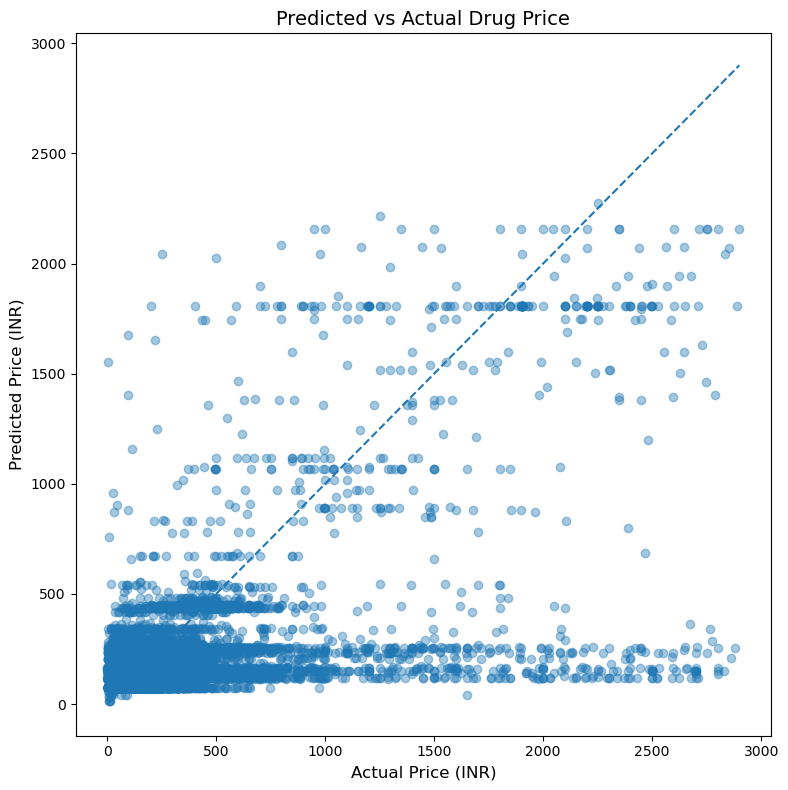


Predicted vs actual plot saved to 'predicted_vs_actual.png'.


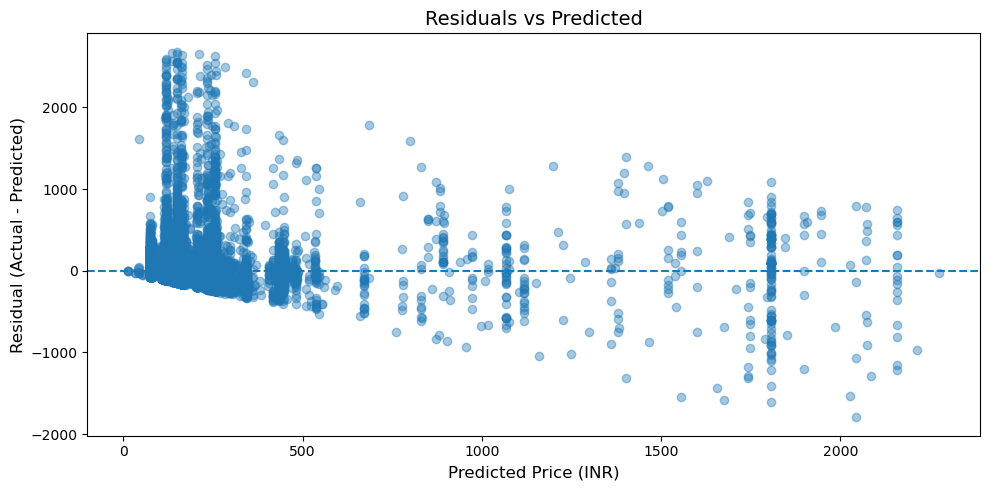

Residuals plot saved to 'residuals_vs_predicted.png'.

[3] Feature Importance (Top 10 Drivers of Price):
|                                         |         0 |
|:----------------------------------------|----------:|
| Salt_Name_Grouped_Meropenem             | 0.38554   |
| Dosage_Value                            | 0.249324  |
| Dosage_Unit_iu                          | 0.0837179 |
| Dosage_Unit_million                     | 0.0526087 |
| Salt_Name_Grouped_Other_Salt            | 0.0481579 |
| Salt_Name_Grouped_Cefuroxime            | 0.0352065 |
| Dosage_Unit_mcg                         | 0.0236404 |
| Is_Multi_Salt                           | 0.0191302 |
| Manufacturer_Grouped_Other_Manufacturer | 0.0114889 |
| Salt_Name_Grouped_Methylprednisolone    | 0.0114739 |


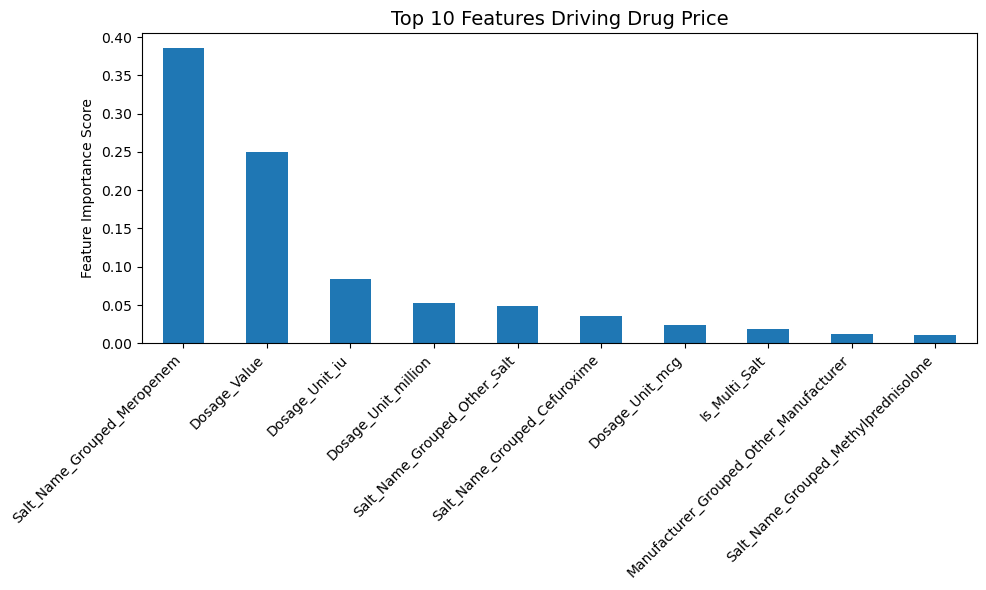


Feature importance visualization saved to 'price_feature_importance.png'.


In [7]:
# TODO show the fisrt version of regression created by AI and then the improved version

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


# --- 1. Load Data ---
# Load the data with engineered features from Part 2
try:
    df = pd.read_csv("features_engineered_medicine_data.csv")
except FileNotFoundError:
    print("Error: 'features_engineered_medicine_data.csv' not found. Please ensure Part 2 was executed successfully.")
    exit()

print("--- Starting Part 3: Machine Learning (Price Prediction) ---")

# --- 2. Data Cleaning and Preparation ---

# Drop rows where critical features (Dosage or Salt) are missing
df.dropna(subset=['Dosage_Value', 'Salt_Name'], inplace=True)

# Remove outliers in price (e.g., top 1%) for a more robust model of typical prices
price_threshold = df['price'].quantile(0.99)
df = df[df['price'] < price_threshold]

# --- 3. Feature Selection and Categorical Handling (Top N Encoding) ---
N_CATEGORIES = 50

# Target Variable
Y = df['price']

# Features
X = df[['Dosage_Value', 'Is_Multi_Salt', 'Salt_Name', 'manufacturer_name', 'Dosage_Unit']]

# Handle 'Salt_Name' (Vibe: "Does the ingredient type drive the price?")
top_salts = X['Salt_Name'].value_counts().head(N_CATEGORIES).index
X['Salt_Name_Grouped'] = np.where(X['Salt_Name'].isin(top_salts), X['Salt_Name'], 'Other_Salt')

# Handle 'manufacturer_name' (Vibe: "Does the brand name drive the price?")
top_manufacturers = X['manufacturer_name'].value_counts().head(N_CATEGORIES).index
X['Manufacturer_Grouped'] = np.where(X['manufacturer_name'].isin(top_manufacturers), X['manufacturer_name'], 'Other_Manufacturer')

# Drop original high-cardinality columns
X = X.drop(columns=['Salt_Name', 'manufacturer_name'])

# Apply One-Hot Encoding to the grouped categorical columns
X_encoded = pd.get_dummies(X, columns=['Salt_Name_Grouped', 'Manufacturer_Grouped', 'Dosage_Unit'], drop_first=True)

print(f"\n[1] Data Prepared. Total Features (Columns): {X_encoded.shape[1]}")

# --- 4. Model Training ---

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Train a powerful yet interpretable model: Random Forest Regressor
# Vibe: "The Price Crystal Ball"
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train, Y_train)

# --- 5. Model Evaluation ---

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(np.mean((Y_test - Y_pred)**2))


print(f"\n[2] Model Evaluation (Random Forest Regressor):")
print(f"R-squared (R²): {r2:.4f} (How much variance is explained by the model)")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR (Average error in price prediction)")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} INR")


# --- 5b. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_pred, alpha=0.4)
plt.title('Predicted vs Actual Drug Price', fontsize=14)
plt.xlabel('Actual Price (INR)', fontsize=12)
plt.ylabel('Predicted Price (INR)', fontsize=12)

# y = x reference line
min_v = min(Y_test.min(), Y_pred.min())
max_v = max(Y_test.max(), Y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v], linestyle='--')

plt.tight_layout()
plt.savefig('images/predicted_vs_actual.png', dpi=200)
plt.show()
plt.close()
print("\nPredicted vs actual plot saved to 'predicted_vs_actual.png'.")


residuals = Y_test - Y_pred
plt.figure(figsize=(10, 5))
plt.scatter(Y_pred, residuals, alpha=0.4)
plt.axhline(0, linestyle='--')
plt.title('Residuals vs Predicted', fontsize=14)
plt.xlabel('Predicted Price (INR)', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.tight_layout()
plt.savefig('images/residuals_vs_predicted.png', dpi=200)
plt.show()
plt.close()
print("Residuals plot saved to 'residuals_vs_predicted.png'.")


# --- 6. Model Interpretation (Feature Importance) ---
# Vibe: "Peeking into the AI's Mind: What truly drives the cost?"

feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
top_10_importances = feature_importances.sort_values(ascending=False).head(10)

print("\n[3] Feature Importance (Top 10 Drivers of Price):")
print(top_10_importances.to_markdown())

# Save importance plot
plt.figure(figsize=(10, 6))
top_10_importances.plot(kind='bar')
plt.title('Top 10 Features Driving Drug Price', fontsize=14)
plt.ylabel('Feature Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/price_feature_importance.png', dpi=200)
plt.show()
plt.close()
print("\nFeature importance visualization saved to 'price_feature_importance.png'.")


In [8]:
Y_train

92774      150.00
120338      60.00
100295      66.00
93231       49.00
170395      54.00
           ...   
123113      79.47
106504     216.00
135459    1450.00
150744     152.30
125269      35.00
Name: price, Length: 198250, dtype: float64

--- Starting Part 3: Machine Learning (Price Prediction) ---

[1] Data Prepared. Total Features (Columns): 293
Rows used for training: 228857

[2] Model Evaluation (HistGradientBoostingRegressor + log1p target):
R-squared (R²): 0.2921
Mean Absolute Error (MAE): 57.98 INR
Root Mean Square Error (RMSE): 181.50 INR


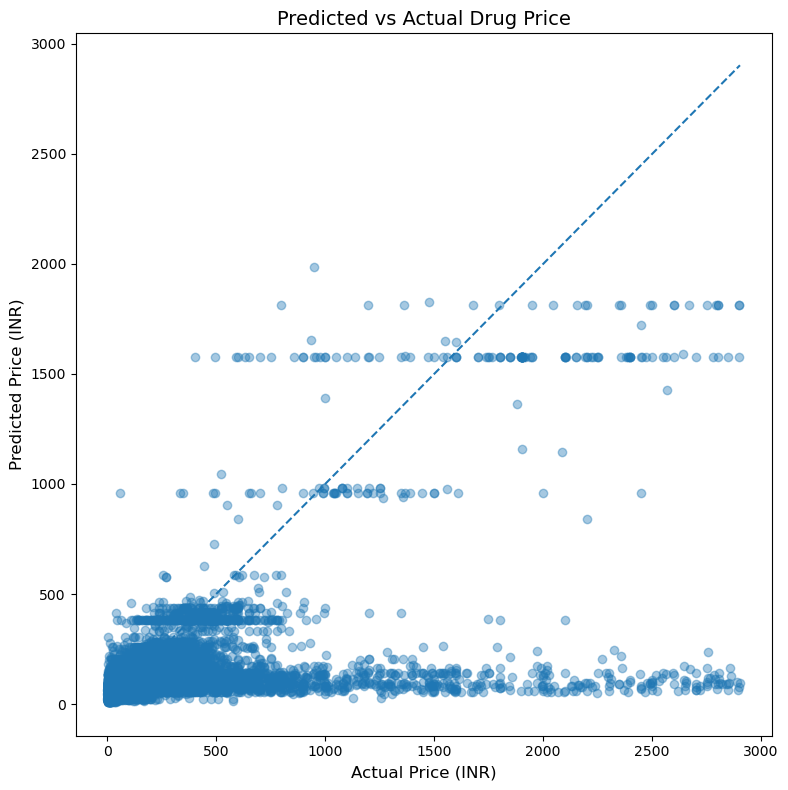


Predicted vs actual plot saved to 'predicted_vs_actual.png'.


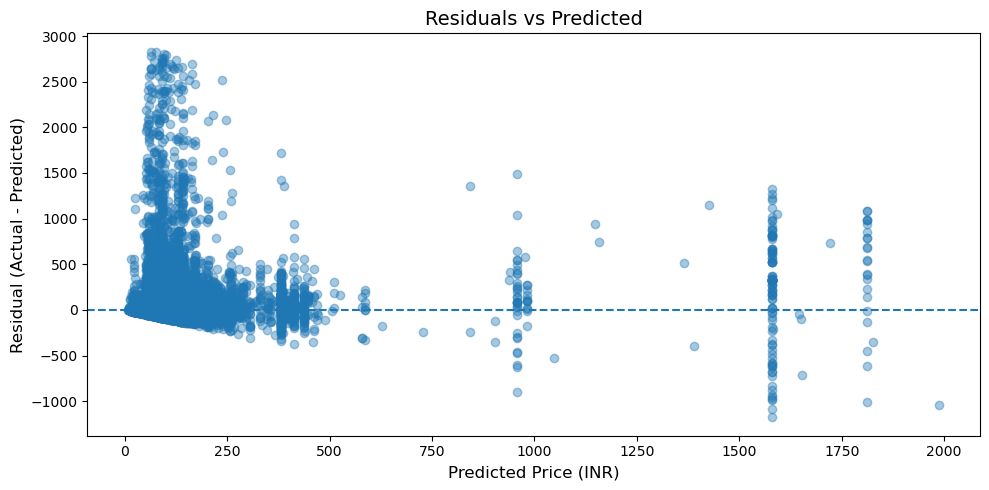

Residuals plot saved to 'residuals_vs_predicted.png'.

[3] Permutation Importance (Top 10 Drivers of Price):


/opt/miniconda3/envs/drug_analysis/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Dosage_mg                         0.312923
Is_Multi_Salt                     0.138200
Salt_Name_Grouped_Meropenem       0.050958
Salt_Name_Grouped_Other_Salt      0.043527
Salt_Name_Grouped_Cefuroxime      0.035033
Salt_Name_Grouped_Diclofenac      0.031167
Salt_Name_Grouped_Paracetamol     0.023768
Salt_Name_Grouped_Nimesulide      0.021190
Salt_Name_Grouped_Itraconazole    0.014307
Salt_Name_Grouped_Atorvastatin    0.013955


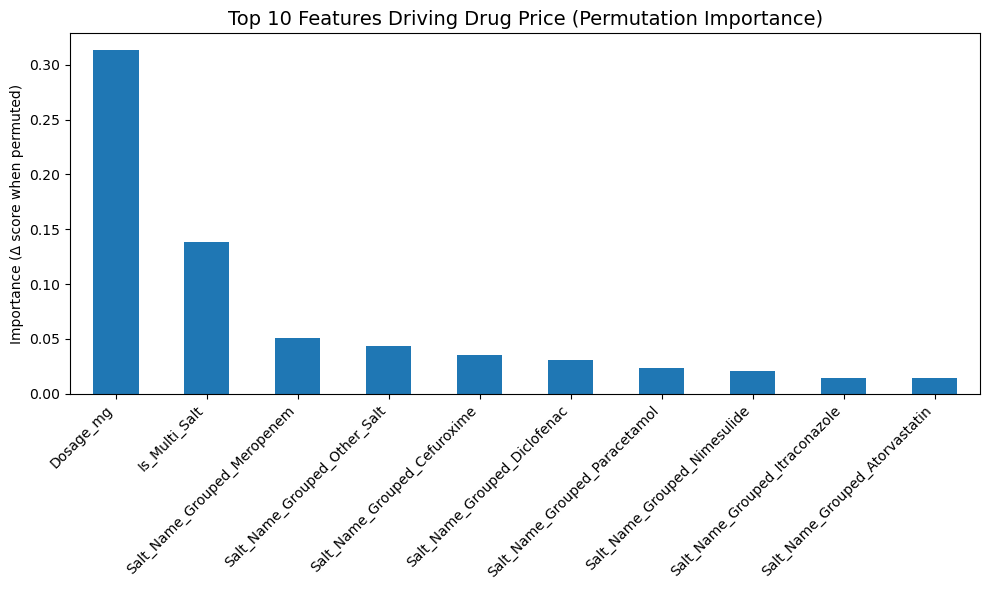


Feature importance visualization saved to 'price_feature_importance.png'.


In [9]:
# The improved version
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt


# --- 1. Load Data ---
try:
    df = pd.read_csv("features_engineered_medicine_data.csv")
except FileNotFoundError:
    print("Error: 'features_engineered_medicine_data.csv' not found. Please ensure Part 2 was executed successfully.")
    exit()

print("--- Starting Part 3: Machine Learning (Price Prediction) ---")

# --- 2. Data Cleaning and Preparation ---

# Drop rows where critical features are missing
df.dropna(subset=['Dosage_Value', 'Dosage_Unit', 'Salt_Name', 'manufacturer_name', 'price'], inplace=True)

# Remove extreme outliers in price (top 1%)
price_threshold = df['price'].quantile(0.99)
df = df[df['price'] < price_threshold]

# Normalize dosage units into mg-equivalent
DOSAGE_MULTIPLIER = {
    'mg': 1.0,
    'g': 1000.0,
    'mcg': 0.001,
    'ug': 0.001,   # sometimes micrograms appear as ug
    'iu': np.nan,  # unknown conversion; will be dropped
}

df['Dosage_Unit'] = df['Dosage_Unit'].astype(str).str.lower().str.strip()
df['Dosage_mg'] = df['Dosage_Value'] * df['Dosage_Unit'].map(DOSAGE_MULTIPLIER)

# Drop rows where we couldn't convert dosage to mg
df.dropna(subset=['Dosage_mg'], inplace=True)

# --- 3. Feature Selection and Categorical Handling (Top N Encoding) ---
N_CATEGORIES = 50

# Target: log1p(price) for better modeling
Y = np.log1p(df['price'])

# Features
X = df[['Dosage_mg', 'Is_Multi_Salt', 'Salt_Name', 'manufacturer_name']].copy()

# Group top salts
top_salts = X['Salt_Name'].value_counts().head(N_CATEGORIES).index
X['Salt_Name_Grouped'] = np.where(X['Salt_Name'].isin(top_salts), X['Salt_Name'], 'Other_Salt')

# Group top manufacturers
top_manufacturers = X['manufacturer_name'].value_counts().head(N_CATEGORIES).index
X['Manufacturer_Grouped'] = np.where(
    X['manufacturer_name'].isin(top_manufacturers),
    X['manufacturer_name'],
    'Other_Manufacturer'
)

# Optional: salt seen at strength buckets (interaction-ish)
X['Dosage_Bin'] = pd.qcut(X['Dosage_mg'], q=5, duplicates='drop').astype(str)
X['Salt_x_DosageBin'] = X['Salt_Name_Grouped'].astype(str) + "_" + X['Dosage_Bin'].astype(str)

# Drop originals (high cardinality)
X = X.drop(columns=['Salt_Name', 'manufacturer_name', 'Dosage_Bin'])

# One-hot encode categoricals
X_encoded = pd.get_dummies(
    X,
    columns=['Salt_Name_Grouped', 'Manufacturer_Grouped', 'Salt_x_DosageBin'],
    drop_first=True
)

print(f"\n[1] Data Prepared. Total Features (Columns): {X_encoded.shape[1]}")
print(f"Rows used for training: {len(X_encoded)}")

# --- 4. Model Training ---
X_train, X_test, Y_train, Y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42
)

# Gradient boosting generally beats RF on tabular problems like this
model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=400,
    random_state=42
)
model.fit(X_train, Y_train)

# --- 5. Model Evaluation (report in INR scale) ---
Y_pred_log = model.predict(X_test)

# Convert back to INR
Y_test_inr = np.expm1(Y_test)
Y_pred_inr = np.expm1(Y_pred_log)

r2 = r2_score(Y_test_inr, Y_pred_inr)
mae = mean_absolute_error(Y_test_inr, Y_pred_inr)
rmse = np.sqrt(np.mean((Y_test_inr - Y_pred_inr) ** 2))

print(f"\n[2] Model Evaluation (HistGradientBoostingRegressor + log1p target):")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} INR")

# --- 5b. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(Y_test_inr, Y_pred_inr, alpha=0.4)
plt.title('Predicted vs Actual Drug Price', fontsize=14)
plt.xlabel('Actual Price (INR)', fontsize=12)
plt.ylabel('Predicted Price (INR)', fontsize=12)

min_v = float(min(Y_test_inr.min(), Y_pred_inr.min()))
max_v = float(max(Y_test_inr.max(), Y_pred_inr.max()))
plt.plot([min_v, max_v], [min_v, max_v], linestyle='--')

plt.tight_layout()
plt.savefig('images/predicted_vs_actual.png', dpi=200)
plt.show()
plt.close()
print("\nPredicted vs actual plot saved to 'predicted_vs_actual.png'.")

# Residuals plot
residuals = Y_test_inr - Y_pred_inr
plt.figure(figsize=(10, 5))
plt.scatter(Y_pred_inr, residuals, alpha=0.4)
plt.axhline(0, linestyle='--')
plt.title('Residuals vs Predicted', fontsize=14)
plt.xlabel('Predicted Price (INR)', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.tight_layout()
plt.savefig('images/residuals_vs_predicted.png', dpi=200)
plt.show()
plt.close()
print("Residuals plot saved to 'residuals_vs_predicted.png'.")

# --- 6. Model Interpretation (Permutation Importance) ---
# (HGBR doesn't have feature_importances_, so we use permutation importance.)
print("\n[3] Permutation Importance (Top 10 Drivers of Price):")
perm = permutation_importance(
    model,
    X_test,
    Y_test,              # IMPORTANT: use log-space here because the model was trained on it
    n_repeats=8,
    random_state=42,
    n_jobs=-1
)

importances = pd.Series(perm.importances_mean, index=X_encoded.columns).sort_values(ascending=False)
top_10 = importances.head(10)
print(top_10.to_string())

plt.figure(figsize=(10, 6))
top_10.plot(kind='bar')
plt.title('Top 10 Features Driving Drug Price (Permutation Importance)', fontsize=14)
plt.ylabel('Importance (Δ score when permuted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/price_feature_importance.png', dpi=200)
plt.show()
plt.close()
print("\nFeature importance visualization saved to 'price_feature_importance.png'.")


--- Starting Part 4: Deep Learning (Digital Guardian Angel) ---
Class distribution:
High_Risk
0    4848
1    2640
Name: count, dtype: int64
High_Risk
0    0.647436
1    0.352564
Name: proportion, dtype: float64
class_weight: {0: 0.7723053120165033, 1: 1.418087121212121}

[Vibe Check] Training the model.
Epoch 1/25


/opt/miniconda3/envs/drug_analysis/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.6398 - loss: 0.5910 - val_accuracy: 0.7913 - val_loss: 0.4691 - learning_rate: 0.0010
Epoch 2/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.8390 - loss: 0.3818 - val_accuracy: 0.7997 - val_loss: 0.3884 - learning_rate: 0.0010
Epoch 3/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.8898 - loss: 0.2802 - val_accuracy: 0.8898 - val_loss: 0.2827 - learning_rate: 0.0010
Epoch 4/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.9210 - loss: 0.2135 - val_accuracy: 0.9082 - val_loss: 0.2362 - learning_rate: 0.0010
Epoch 5/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9306 - loss: 0.1885 - val_accuracy: 0.9149 - val_loss: 0.2371 - learning_rate: 0.0010
Epoch 6/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9434 - loss: 0.1541 - val_accuracy: 0.9399 - val_loss: 0.1949 - learning_rate: 0.0010
Epoch 7/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9508 - loss:

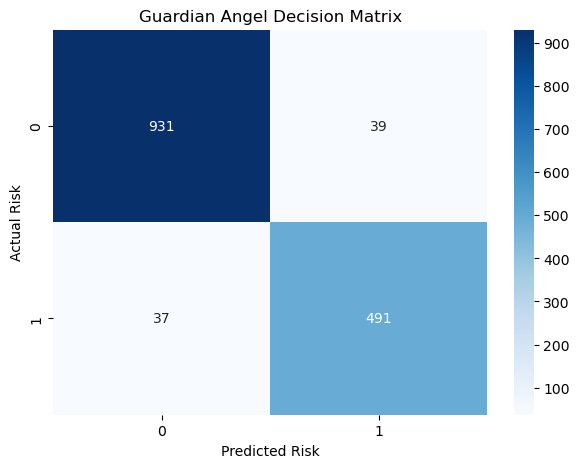

In [72]:
# ==========================================
# PART 4: DEEP LEARNING (NLP)
# ==========================================

import pandas as pd
import numpy as np
import re
import ast
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("--- Starting Part 4: Deep Learning (Digital Guardian Angel) ---")

# --------------------------
# 1) TEXT CLEANING (shared)
# --------------------------
def clean_text_keep_dosage(x: str) -> str:
    """
    Keep letters + digits + a few dosage-friendly symbols.
    This helps preserve dataset patterns like '500', '0.25mg', 'DT', etc.
    """
    x = str(x).lower()
    # Keep: a-z, 0-9, whitespace, . - % /
    x = re.sub(r'[^a-z0-9\s\.\-\%\/]', ' ', x)
    x = re.sub(r'\s+', ' ', x).strip()
    return x

# --------------------------
# 2) DATA LOAD & TARGETING
# --------------------------
df = pd.read_csv("data/updated_indian_medicine_data.csv")
df_dl = df.dropna(subset=['drug_interactions', 'medicine_desc', 'side_effects']).copy()

def check_high_risk(interaction_str):
    try:
        data = ast.literal_eval(interaction_str)
        effects = data.get('effect', [])
        s = str(effects).upper()
        return 1 if ("LIFE-THREATENING" in s or "SERIOUS" in s) else 0
    except Exception:
        return 0

df_dl['High_Risk'] = df_dl['drug_interactions'].apply(check_high_risk)
Y = df_dl['High_Risk'].astype(int).values

print("Class distribution:")
print(df_dl['High_Risk'].value_counts())
print(df_dl['High_Risk'].value_counts(normalize=True))

# --------------------------
# 3) TEXT TO NUMBERS
# --------------------------
X_text = (df_dl['medicine_desc'].astype(str) + ' ' + df_dl['side_effects'].astype(str)).apply(clean_text_keep_dosage)

# Bigger vocab + slightly longer sequences (medical text is sparse)
MAX_WORDS = 20000
MAX_LEN = 180

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<UNK>')
tokenizer.fit_on_texts(X_text)
sequences = tokenizer.texts_to_sequences(X_text)
X_padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# --------------------------
# 4) BUILDING & TRAINING
# --------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X_padded, Y, test_size=0.2, random_state=42, stratify=Y
)

# Class weights (balanced training)
classes = np.array([0, 1])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=Y_train)
class_weight = {0: float(weights[0]), 1: float(weights[1])}
print("class_weight:", class_weight)

model = Sequential([
    Embedding(MAX_WORDS, 64, input_length=MAX_LEN),
    SpatialDropout1D(0.25),
    GRU(96, dropout=0.25, recurrent_dropout=0.25),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
]

print("\n[Vibe Check] Training the model.")
history = model.fit(
    X_train, Y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weight,
    callbacks=callbacks,
    verbose=1
)

# --------------------------
# 5) EVALUATION
# --------------------------
test_probs = model.predict(X_test, verbose=0).ravel()
Y_pred = (test_probs > 0.5).astype(int)

print("\nProb stats on test set:")
print("min:", float(np.min(test_probs)), "mean:", float(np.mean(test_probs)), "max:", float(np.max(test_probs)))
print("avg prob when true label=0:", float(np.mean(test_probs[Y_test == 0])))
print("avg prob when true label=1:", float(np.mean(test_probs[Y_test == 1])))

print("\n--- Final Truth Test (Classification Report) ---")
print(classification_report(Y_test, Y_pred))

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Guardian Angel Decision Matrix')
plt.xlabel('Predicted Risk')
plt.ylabel('Actual Risk')
plt.savefig("images/classification_accuracy.png", dpi=200)
plt.show()



In [68]:
pd.set_option('display.max_colwidth', None)
print(df['medicine_desc'])
df['medicine_desc'].head(10)

0                                                                                                                                                                                                                 Augmentin 625 Duo Tablet is a penicillin-type of antibiotic that helps your body fight infections caused by bacteria. It is used to treat infections of the lungs (e.g., pneumonia), ear, nasal sinus, urinary tract, skin and soft tissue. It will not work for viral infections such as the common cold.Augmentin 625 Duo Tablet is best taken with a meal to reduce the chance of a stomach upset. You should take it regularly at evenly spaced intervals as per the schedule prescribed by your doctor. Taking it at the same time every day will help you to remember to take it. The dose will depend on what you are being treated for, but you should always complete a full course of this antibiotic as prescribed by your doctor. Do not stop taking it until you have finished, even when you feel better

0                                                                                                                                                                                                            Augmentin 625 Duo Tablet is a penicillin-type of antibiotic that helps your body fight infections caused by bacteria. It is used to treat infections of the lungs (e.g., pneumonia), ear, nasal sinus, urinary tract, skin and soft tissue. It will not work for viral infections such as the common cold.Augmentin 625 Duo Tablet is best taken with a meal to reduce the chance of a stomach upset. You should take it regularly at evenly spaced intervals as per the schedule prescribed by your doctor. Taking it at the same time every day will help you to remember to take it. The dose will depend on what you are being treated for, but you should always complete a full course of this antibiotic as prescribed by your doctor. Do not stop taking it until you have finished, even when you feel better. If 

In [74]:

# --------------------------
# 6) CLIENT USAGE (Inference helpers)
# --------------------------
def preprocess_text(text: str):
    text = clean_text_keep_dosage(text)  # MUST match training
    seq = tokenizer.texts_to_sequences([text])
    return pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')

def predict_high_risk(medicine_description: str, side_effects: str, threshold: float = 0.5):
    combined = f"{medicine_description} {side_effects}"
    x = preprocess_text(combined)
    prob = float(model.predict(x, verbose=0)[0][0])  # verbose=0 hides the 1/1 progress bar
    label = int(prob >= threshold)
    return prob, label

# --------------------------


# 7) FINAL MODEL DEMO (HARDCODED)
# --------------------------
print("\n========== FINAL MODEL DEMO ==========")

# LOW risk example
low_desc = """
This medicine is used for mild seasonal allergies and runny nose.
It is generally well tolerated for short-term use.
"""
low_se = "Mild drowsiness, dry mouth."
p, y = predict_high_risk(low_desc, low_se)
print("\n--- LOW RISK EXAMPLE ---")
print(f"Risk Probability: {p:.2f}")
print(f"Predicted Risk Level: {'HIGH RISK ⚠️' if y == 1 else 'LOW RISK ✅'}")

# HIGH risk example (dataset-style, dosage tokens preserved)
high_desc = """
Clonotril 0.25mg Tablet DT is a prescription medicine used to treat epilepsy (seizures)
and anxiety disorder. It helps to decrease abnormal and excessive activity of the nerve
cells and calms the brain.
"""
high_se = "Depression, Dizziness, Drowsiness, Fatigue, Impaired coordination"
p, y = predict_high_risk(high_desc, high_se)
print("\n--- HIGH RISK EXAMPLE ---")
print(f"Risk Probability: {p:.2f}")
print(f"Predicted Risk Level: {'HIGH RISK ⚠️' if y == 1 else 'LOW RISK ✅'}")

# Question, why do we have so low number of data?
# accuracy metric maybe high, but we have over-fitting


========== FINAL MODEL DEMO ==========

--- LOW RISK EXAMPLE ---
Risk Probability: 0.01
Predicted Risk Level: LOW RISK ✅

--- HIGH RISK EXAMPLE ---
Risk Probability: 0.21
Predicted Risk Level: LOW RISK ✅


In [12]:

# Fix count problems
# https://chatgpt.com/c/6964c208-cf50-8327-aeb2-2c152ce0daec
df.count()


# fix sensitivity problem and high-risk string and other aspects
# https://gemini.google.com/app/7d8762c17a57d31d



id                    253973
name                  253973
price                 253973
Is_discontinued       253973
manufacturer_name     253973
type                  253973
pack_size_label       253973
short_composition1    253973
short_composition2    112171
salt_composition        7488
medicine_desc           7488
side_effects            7488
drug_interactions       7488
dtype: int64

In [76]:
# 7) FINAL MODEL DEMO (HARDCODED)
# --------------------------
print("\n========== FINAL MODEL DEMO, lowered predict theshold ==========")

# LOW risk example
low_desc_short = """mild seasonal allergies"""
low_se = "Mild drowsiness, dry mouth."
p, y = predict_high_risk(low_desc_short, low_se, 0.3)
print("\n--- LOW RISK EXAMPLE ---")
print(f"Risk Probability: {p:.2f}")
print(f"Predicted Risk Level: {'HIGH RISK ⚠️' if y == 1 else 'LOW RISK ✅'}")

# HIGH risk example (dataset-style, dosage tokens preserved)
high_desc_short = """anxiety"""
high_se = "Depression, Dizziness, Drowsiness, Fatigue, Impaired coordination"
p, y = predict_high_risk(high_desc_short, high_se, 0.3)
print("\n--- HIGH RISK EXAMPLE ---")
print(f"Risk Probability: {p:.2f}")
print(f"Predicted Risk Level: {'HIGH RISK ⚠️' if y == 1 else 'LOW RISK ✅'}")



========== FINAL MODEL DEMO, lowered predict theshold ==========

--- LOW RISK EXAMPLE ---
Risk Probability: 0.01
Predicted Risk Level: LOW RISK ✅

--- HIGH RISK EXAMPLE ---
Risk Probability: 0.82
Predicted Risk Level: HIGH RISK ⚠️


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


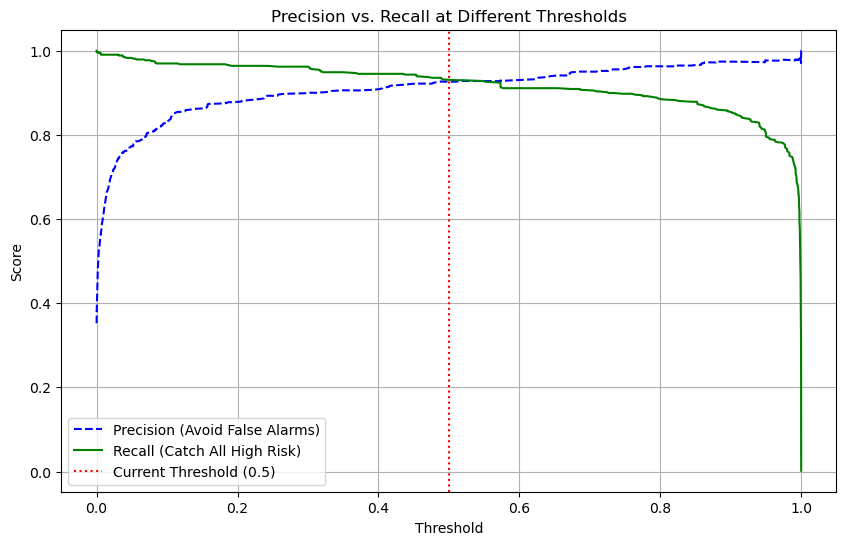

In [77]:
from sklearn.metrics import precision_recall_curve

# Get probabilities for the positive class
y_scores = model.predict(X_test).ravel()
precisions, recalls, thresholds = precision_recall_curve(Y_test, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision (Avoid False Alarms)")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall (Catch All High Risk)")
plt.axvline(x=0.5, color='red', linestyle=':', label='Current Threshold (0.5)')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs. Recall at Different Thresholds")
plt.legend()
plt.grid(True)
plt.savefig("images/Precision vs. Recall at Different Thresholds.png", dpi=200)
plt.show()

In [57]:
from sklearn.model_selection import StratifiedKFold

# Configuration
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
cv_scores = []

print("--- Starting 5-Fold Cross-Validation ---")

for train_idx, val_idx in kf.split(X_padded, Y):
    # Split data
    X_train_cv, X_val_cv = X_padded[train_idx], X_padded[val_idx]
    Y_train_cv, Y_val_cv = Y[train_idx], Y[val_idx]
    
    # Rebuild a fresh model for each fold
    model_cv = Sequential([
        Embedding(MAX_WORDS, 64, input_length=MAX_LEN),
        SpatialDropout1D(0.2),
        GRU(64), # Simplified to reduce overfitting
        Dense(1, activation='sigmoid')
    ])
    model_cv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train
    model_cv.fit(X_train_cv, Y_train_cv, epochs=5, batch_size=32, verbose=0)
    
    # Evaluate
    scores = model_cv.evaluate(X_val_cv, Y_val_cv, verbose=0)
    print(f"Fold {fold_no} Accuracy: {scores[1]:.4f}")
    cv_scores.append(scores[1])
    fold_no += 1

print(f"\nAverage CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

--- Starting 5-Fold Cross-Validation ---


/opt/miniconda3/envs/drug_analysis/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Fold 1 Accuracy: 0.9499
Fold 2 Accuracy: 0.9680
Fold 3 Accuracy: 0.9566
Fold 4 Accuracy: 0.9339
Fold 5 Accuracy: 0.9633

Average CV Accuracy: 0.9543 (+/- 0.0119)


In [58]:
# Calculate F1-scores for all thresholds
f1_scores = (2 * precisions * recalls) / (precisions + recalls)
# Find the index of the highest F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Optimal Threshold for Balance: {best_threshold:.4f}")
print(f"Best F1 Score: {f1_scores[best_idx]:.4f}")

# Update your prediction function to use this
def predict_safe(desc, side_effects):
    prob, _ = predict_high_risk(desc, side_effects, threshold=best_threshold)
    label = "HIGH RISK ⚠️" if prob >= best_threshold else "LOW RISK ✅"
    return prob, label

Optimal Threshold for Balance: 0.5999
Best F1 Score: 0.9559


In [60]:
# set new threshold
def predict_guardian_angel(description, side_effects):
    # Use the threshold found by your F1 analysis
    OPTIMAL_THRESHOLD = 0.5999 
    
    prob, _ = predict_high_risk(description, side_effects, threshold=OPTIMAL_THRESHOLD)
    
    if prob >= OPTIMAL_THRESHOLD:
        status = "⚠️ HIGH RISK"
        color = "\033[91m" # Red text for console
    else:
        status = "✅ LOW RISK"
        color = "\033[92m" # Green text for console
        
    print(f"{color}Prediction: {status} (Confidence: {prob:.2%})")
    return prob, status

In [14]:
# ==========================================
# PART 5: TRANSFORMERS (Modern AI)
# "The Semantic Vibe Search"
# ==========================================

# Note: You may need to install the library first:
# !pip install sentence-transformers

import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch

print("--- Starting Part 5: Transformers (Semantic Search) ---")

# 1. PREPARE DATA
# We use the subset that has descriptions (the "medical knowledge")
df = pd.read_csv("data/updated_indian_medicine_data.csv")
df_search = df.dropna(subset=['medicine_desc']).copy().reset_index(drop=True)

# To make it run fast in a notebook, we'll use the first 2000 descriptions
# df_search = df_search.head(2000)

print(f"[0] Knowledge Base ready: {len(df_search)} medicines indexed.")

# 2. LOAD THE TRANSFORMER (The Alchemist)
# Vibe: "Loading a pre-trained brain that already knows the English language."
model = SentenceTransformer('all-MiniLM-L6-v2')

# 3. VECTORIZE THE VIBE (Encoding)
# We turn medical descriptions into "Embeddings" (numerical maps of meaning)
print("[1] Encoding medical knowledge into vector space... (The AI is 'reading' the data)")
descriptions = df_search['medicine_desc'].tolist()
embeddings = model.encode(descriptions, convert_to_tensor=True)

# 4. DEFINE THE SEARCH FUNCTION
def semantic_search(query, top_k=3):
    # Vibe: "Turning the user's human words into a mathematical vector"
    query_embedding = model.encode(query, convert_to_tensor=True)
    
    # Calculate "Cosine Similarity" (how close the query vibe is to the drug vibe)
    hits = util.semantic_search(query_embedding, embeddings, top_k=top_k)
    hits = hits[0] # Get results for the first query

    print(f"\nSearch Query: '{query}'")
    print("-" * 30)
    for hit in hits:
        idx = hit['corpus_id']
        score = hit['score']
        medicine = df_search.iloc[idx]
        print(f"Medicine: {medicine['name']} (Match Score: {score:.4f})")
        # Print a snippet of why it matched
        print(f"Vibe: {medicine['medicine_desc'][:150]}...")
        print("-" * 10)

# 5. TEST THE MAGIC
# Vibe: "Testing the AI with human language instead of medical keywords."
semantic_search("I have a bad bacterial infection in my lungs")
semantic_search("Something for seasonal allergies and itchy eyes")
semantic_search("Medicine for high blood pressure")

print("\n--- Part 5 Complete. You've built a Transformer-powered Search Engine! ---")

/opt/miniconda3/envs/drug_analysis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Starting Part 5: Transformers (Semantic Search) ---
[0] Knowledge Base ready: 7488 medicines indexed.
[1] Encoding medical knowledge into vector space... (The AI is 'reading' the data)

Search Query: 'I have a bad bacterial infection in my lungs'
------------------------------
Medicine: Amoxycillin 500mg Capsule (Match Score: 0.4629)
Vibe: Amoxycillin 500mg Capsule is a penicillin-type of antibiotic used to treat a variety of bacterial infections. It is effective in infections of the thr...
----------
Medicine: Septran C Tablet (Match Score: 0.4599)
Vibe: Septran C Tablet is an antibiotic medicine used to treat bacterial infections in your body. It is effective in infections of the lungs (eg. pneumonia,...
----------
Medicine: Pentids 400 Tablet (Match Score: 0.4412)
Vibe: Pentids 400 Tablet is an antibiotic used to treat a variety of bacterial infections. It is effective in infections of the throat, ear, nasal sinuses, ...
----------

Search Query: 'Something for seasonal allergie

--- Glitch Report for Cefixime ---
Total Products: 8387
Anomalies Found: 163


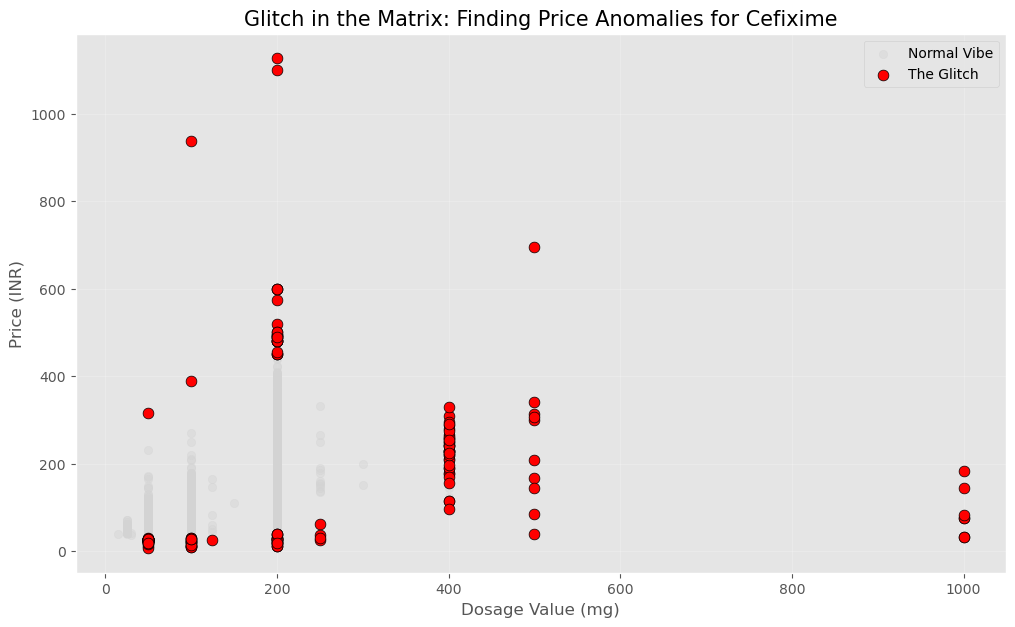


--- Top 5 Most Expensive 'Glitches' ---
                                name  Dosage_Value    price  \
246763              Zim 200mg Tablet         200.0  1126.73   
175936           Prifix 200mg Tablet         200.0  1100.00   
93731          Fiximark 100mg Tablet         100.0   937.50   
36609             CF3 O 500mg Tablet         500.0   696.00   
207070  Sumcef LZ 200mg/600mg Tablet         200.0   600.00   

                   manufacturer_name  
246763   Troikaa Pharmaceuticals Ltd  
175936            Priya Life Science  
93731   Glenmark Pharmaceuticals Ltd  
36609      Care Benzorganics Pvt Ltd  
207070              Smile Healthcare  


In [18]:
# ==========================================
# PART 6: ANOMALY DETECTION
# "The Glitch in the Matrix"
# ==========================================

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import re

# 1. PREPARE THE VIBE (Using Cefixime as our case study)
df = pd.read_csv("data/updated_indian_medicine_data.csv")

# Extract Salt and Dosage using a robust "apply" approach
def extract_salt(comp):
    return str(comp).split(' (')[0].strip()

def extract_dosage(comp):
    match = re.search(r'\((\d*\.?\d+)\s*[a-zA-Z]+\)', str(comp))
    return float(match.group(1)) if match else np.nan

df['Salt_Name'] = df['short_composition1'].apply(extract_salt)
df['Dosage_Value'] = df['short_composition1'].apply(extract_dosage)

# Focus on Cefixime to find outliers in a single "neighborhood"
df_salt = df[(df['Salt_Name'] == 'Cefixime')].dropna(subset=['Dosage_Value', 'price']).copy()

# 2. THE ANOMALY SEARCH
# Vibe: "If most 200mg tablets cost 100-200 INR, why does this one cost 1,000?"
iso_forest = IsolationForest(contamination=0.02, random_state=42) # We expect 2% anomalies

# We use log price to keep the visualization clean
df_salt['Log_Price'] = np.log1p(df_salt['price'])

# Train the "Glitch Detector"
df_salt['Anomaly_Score'] = iso_forest.fit_predict(df_salt[['Dosage_Value', 'Log_Price']])

# -1 = Anomaly, 1 = Normal
anomalies = df_salt[df_salt['Anomaly_Score'] == -1]
normals = df_salt[df_salt['Anomaly_Score'] == 1]

print(f"--- Glitch Report for Cefixime ---")
print(f"Total Products: {len(df_salt)}")
print(f"Anomalies Found: {len(anomalies)}")

# 3. VISUALIZING THE GLITCH
plt.figure(figsize=(12, 7))
plt.scatter(normals['Dosage_Value'], normals['price'], color='lightgrey', alpha=0.4, label='Normal Vibe')
plt.scatter(anomalies['Dosage_Value'], anomalies['price'], color='red', edgecolor='black', s=60, label='The Glitch')

plt.title('Glitch in the Matrix: Finding Price Anomalies for Cefixime', fontsize=15)
plt.xlabel('Dosage Value (mg)')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# 4. SHOW THE TOP GLITCHES
print("\n--- Top 5 Most Expensive 'Glitches' ---")
print(anomalies.sort_values(by='price', ascending=False)[['name', 'Dosage_Value', 'price', 'manufacturer_name']].head(5))

--- Starting Part 7: The Scare Scale ---
[1] Correlation between Scare Factor and Price: 0.0271


/var/folders/w1/_ftnzz4s0jdb0cyn80m370dr0000gn/T/ipykernel_89159/1444628685.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_scare = df_se.groupby('Intensity')['price'].mean()


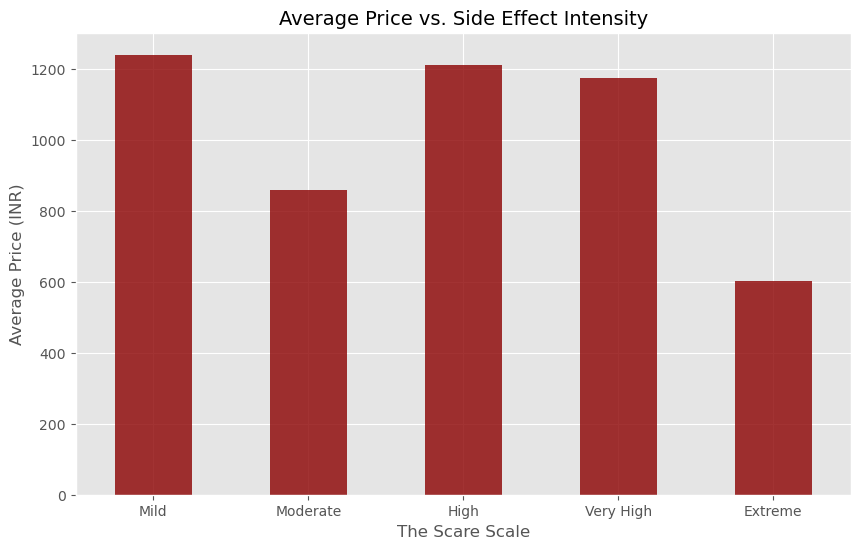


--- Spotlight: The Highest Scare Score ---
Medicine: Aneket 10mg Injection
Score: 37
Reported Effects: Rash,Erythema (skin redness),Vomiting,Nausea,Agitation,Nightmare,Abnormal behavior,Double vision,Hallucination,Increased respiratory rate ,High blood pressure,Confusion,Nystagmus (involuntary eye movement),Muscle coordination impaired,Tonic-clonic seizures,Tachycardia


In [19]:
# ==========================================
# PART 7: SENTIMENT & INTENSITY ANALYSIS
# "The Side Effect Scare Scale"
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD AND FILTER
# We only use rows that have reported side effects
df = pd.read_csv("data/updated_indian_medicine_data.csv")
df_se = df.dropna(subset=['side_effects']).copy()

print(f"--- Starting Part 7: The Scare Scale ---")

# 2. THE SEVERITY DICTIONARY (Vibe: "Quantifying the Fear")
# We assign 'weights' to specific medical terms.
severity_map = {
    'nausea': 1, 'headache': 1, 'fatigue': 1, 'sleepiness': 1, # Mild
    'vomiting': 3, 'diarrhea': 3, 'rash': 3, 'hives': 3,       # Moderate
    'blurred vision': 7, 'chest pain': 7, 'tremor': 7,         # High
    'liver damage': 15, 'kidney failure': 15, 'seizures': 15,  # Severe
    'hallucination': 15, 'anaphylaxis': 15
}

def calculate_scare_score(text):
    """Checks for keywords and sums their severity weights."""
    if pd.isna(text): return 0
    text = str(text).lower()
    score = 0
    for word, weight in severity_map.items():
        if word in text:
            score += weight
    return score

# 3. SCORING THE MEDICINES
# Vibe: "Turning a list of symptoms into a single 'Intensity' number."
df_se['Scare_Score'] = df_se['side_effects'].apply(calculate_scare_score)

# 4. ANALYSIS: DOES RISK EQUAL COST?
correlation = df_se[['Scare_Score', 'price']].corr().iloc[0, 1]
print(f"[1] Correlation between Scare Factor and Price: {correlation:.4f}")

# 5. VISUALIZING THE RESULTS
# We group scores into buckets for a cleaner "Vibe Check"
df_se['Intensity'] = pd.cut(df_se['Scare_Score'], bins=[0, 2, 5, 10, 20, 100], 
                           labels=['Mild', 'Moderate', 'High', 'Very High', 'Extreme'])

avg_price_by_scare = df_se.groupby('Intensity')['price'].mean()

plt.figure(figsize=(10, 6))
avg_price_by_scare.plot(kind='bar', color='darkred', alpha=0.8)
plt.title('Average Price vs. Side Effect Intensity', fontsize=14)
plt.ylabel('Average Price (INR)')
plt.xlabel('The Scare Scale')
plt.xticks(rotation=0)
plt.show()

# 6. THE "SCARIEST" DRUG SPOTLIGHT
scariest = df_se.loc[df_se['Scare_Score'].idxmax()]
print(f"\n--- Spotlight: The Highest Scare Score ---")
print(f"Medicine: {scariest['name']}")
print(f"Score: {scariest['Scare_Score']}")
print(f"Reported Effects: {scariest['side_effects']}")